<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [1]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt

# create IoT Analytics client
client = boto3.client('iotanalytics')

Now we can get the data location (URL) for the given dataset and start working with the data (In order to need to perform get_dataset_content, you need to grant iot analytics corresponding IAM permission):

In [10]:
dataset = "emissions_dataset"

dataset_obj = client.get_dataset_content(datasetName = dataset)

dataset_url = dataset_obj['entries'][0]['dataURI']

# start working with the data

data = pd.read_csv(dataset_url)

<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>

Text(0, 0.5, 'Rate')

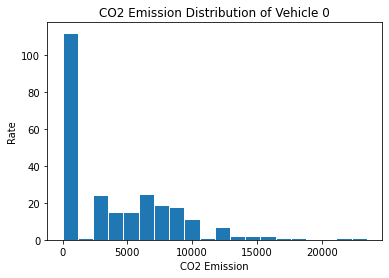

In [17]:
vehi0_co2=data[data['thing_name']=='vehi0']['co2']
plt.hist(vehi0_co2,bins=20,edgecolor="w")
plt.title("CO2 Emission Distribution of Vehicle 0")
plt.xlabel("CO2 Emission")
plt.ylabel("Rate")

Text(0, 0.5, 'Max CO2 Emission')

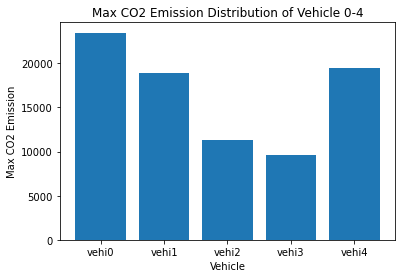

In [14]:
maxco2 = data.groupby('thing_name')['co2'].max().reset_index()
plt.bar(maxco2['thing_name'],maxco2['co2'])
plt.title("Max CO2 Emission Distribution of Vehicle 0-4")
plt.xlabel("Vehicle")
plt.ylabel("Max CO2 Emission")

Text(0, 0.5, 'Average CO2 Emission')

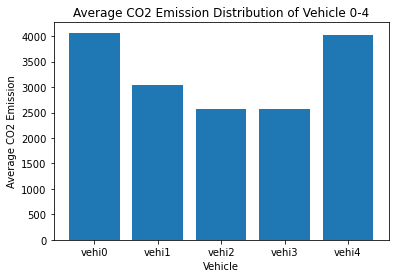

In [18]:
meanco2 = data.groupby('thing_name')['co2'].mean().reset_index()
plt.bar(meanco2['thing_name'],meanco2['co2'])
plt.title("Average CO2 Emission Distribution of Vehicle 0-4")
plt.xlabel("Vehicle")
plt.ylabel("Average CO2 Emission")